## Machine Learning - Unsupervised method

Problem domain: Analysis of Bitcoin stock market from 02th April 2023 to 02nd April 2024

Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,682,031. The last known price of Bitcoin is 64,315.76152533 USD and is down -4.63 over the last 24 hours. It is currently trading on 10992 active market(s) with $58,106,794,683.09 traded over the last 24 hours. More information can be found at https://bitcoin.org/ (“Bitcoin USD (BTC-USD) Stock Price, Quote, History & News”)

The objective of this project is implement unsupervised ML learning method using K-Means and DBSCAN clustering algorithms which will try to recognize patterns into the dataset. 


How does the price develop within the year, so are there recurring patterns within a year?

Are there specific months or even days of the week when the price tends to fall or rise on average?

Which extreme values can be found in the data set, is there any specific the reason for this??

### Importing libraries to perform data manaipulation and anaylysis  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")





### Read dataset 

In [2]:
df = pd.read_csv('BTC-USD.csv')

### Visualizing firt row of the dataset 

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380


### Data information

The dataset has 367 rows and 7 columns in which 5 has been defined as a float64, 1 feature as an int64 (Volume) and 1 as an object (Date). 

There is no missing values in any columns in the dataset. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


### Transforming Volume feature into float64 to make the dataset uniform

In [5]:
df['Volume'] = df['Volume'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.2+ KB


### Statistical summary 

All the columns have the count of 367

In the column Open the mean represents the value of 36566 while the median is 30315 which has a significant distance between them. The Close feature has similar values, it has mean of 36668 and median of 30318. 
The minimum value in the features vary from 24797 to 25121, whereas maximum values are 71334 to 73750. 

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,36566.133366,37245.166175,35951.784331,36668.765678,36668.765678,2.054025e+10
std,12297.066565,12727.681790,11862.108972,12383.550524,12383.550524,1.346815e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27552.037110,27984.726562,27100.661133,27557.231445,27557.231445,1.216358e+10
50%,30315.976563,30636.029297,29966.386719,30318.496094,30318.496094,1.649319e+10
75%,42649.451172,43357.119140,41852.763672,42700.660157,42700.660157,2.387294e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


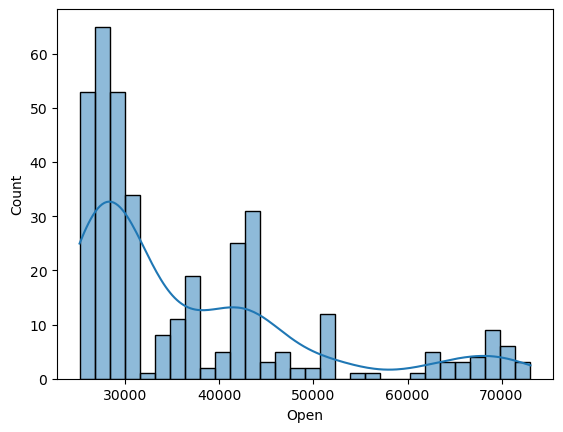

In [7]:
sns.histplot(df['Open'], bins=30, kde=True);

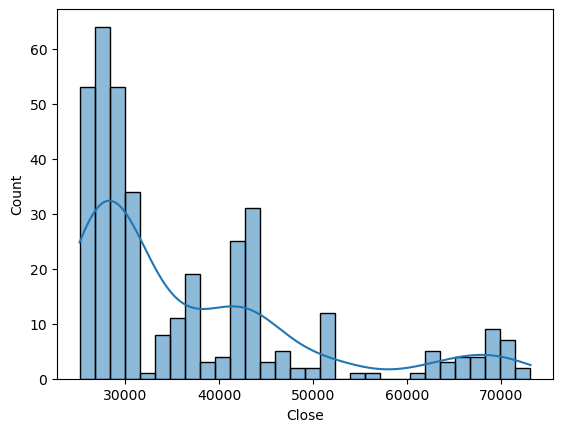

In [8]:
sns.histplot(df['Close'], bins=30, kde=True);

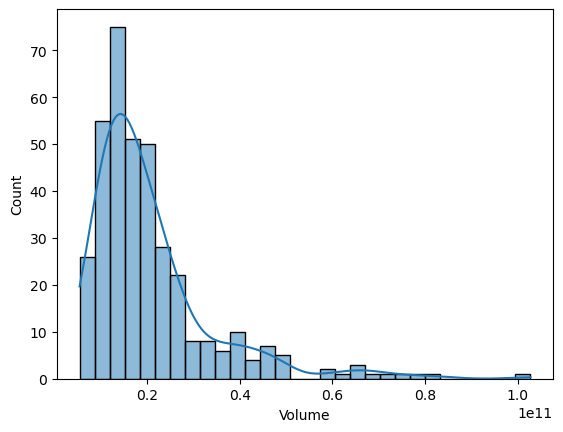

In [9]:
sns.histplot(df['Volume'], bins=30, kde=True);

<Axes: xlabel='Open', ylabel='Volume'>

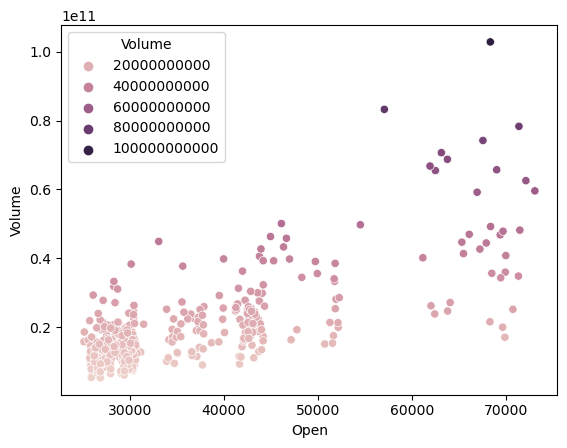

In [10]:
sns.scatterplot(data = df, x = 'Open', y = 'Volume', hue = 'Volume')

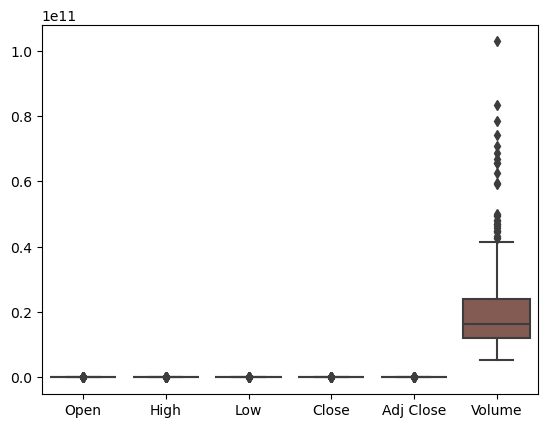

In [11]:
sns.boxplot(df);

In [12]:
#Sort years values from the column 'Year_of_release'
df.sort_values(by=['Date'], inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,1.228464e+10
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,1.955650e+10
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,1.528454e+10
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,1.705232e+10
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,1.383781e+10


In [13]:
# Sort the data according to 'Global_Sales'
top_open_df = df.sort_values(by='Open', ascending=False)

# Select the top 5 games results 
top10_open = top_open_df.head(10)

# Visualising top5_games dataframe first 5 rows
top10_open[['Date', 'Open']].head(10)

,Date,Open
347,2024-03-14,73079.375000
345,2024-03-12,72125.125000
346,2024-03-13,71482.117188
348,2024-03-15,71387.875000
365,2024-04-01,71333.484375
362,2024-03-29,70744.796875
360,2024-03-27,69991.898438
359,2024-03-26,69931.328125
363,2024-03-30,69893.445313
366,2024-04-02,69694.046875


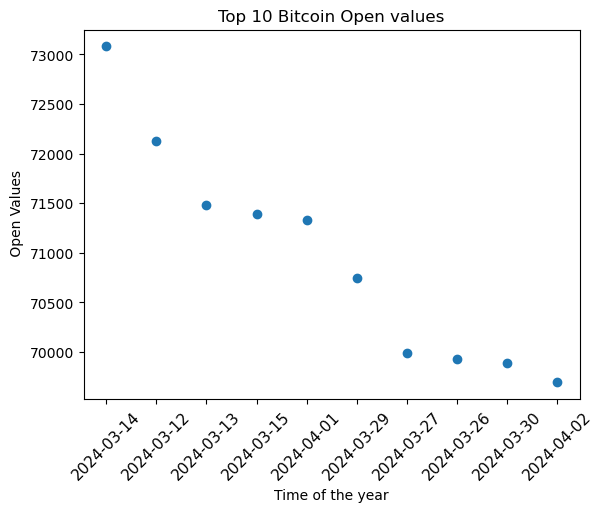

In [14]:
# Plot the Clusters
plt.scatter(top10_open['Date'], top10_open['Open'], marker="o",cmap="bwr_r")

# Set title of the plot
plt.title('Top 10 Bitcoin Open values')
# Set x-axis label
plt.xlabel('Time of the year')
# Set y-axis label
plt.ylabel(' Open Values')
#
plt.xticks(rotation = 45, fontsize= 11)
# Display the plot
plt.show()

In [15]:
df2 = df.drop(columns=['Date', 'Adj Close'])
df2.head()

,Open,High,Low,Close,Volume
0,28462.845703,28518.958984,27884.087891,28199.308594,1.228464e+10
1,28183.080078,28475.623047,27276.720703,27790.220703,1.955650e+10
2,27795.273438,28433.742188,27681.304688,28168.089844,1.528454e+10
3,28169.726563,28739.238281,27843.763672,28177.984375,1.705232e+10
4,28175.226563,28178.384766,27738.759766,28044.140625,1.383781e+10


In [ ]:
#Plot a Pairgrid 
g = sns.PairGrid(df2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Normalize the data 

In order to work with distance-based algorithms, like for example the K-Means clustering the data must be normalized. Because of the different scalling of the variables, those can be weighted differently in the distance formula that has been improved in the training process. 
(Mar. 2023, www.datacamp.com/tutorial/k-means-clustering-python.)

In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df2)
transformer
RobustScaler()
transformer.transform(df2)

## Find the best number of K

To find the optimal number of K in the KMeans clustering it will be used The Elbow Method. In this method will be focused on the percentage of variance for the different number of K. 
As the number of K increase, the variance will decrease. The aim is to select the number of clusters that adding to another cluster there is no significant change in the variance. (Avinash Navlani et al.)

As the number of K is increased it can be seen improvements in clusters and what they represent until a certain point. The value of K at which the improvement performance declines or start to get flatten will be considered the Elbow point. (Mar. 2023, www.datacamp.com/tutorial/k-means-clustering-python)


In [ ]:
# import K-means
from sklearn.cluster import KMeans

wcss_list = []

# Run a loop for different value of number of cluster
for i in range(1, 6):
    
 # Create and fit the KMeans model
 kmeans_model = KMeans(n_clusters = i, random_state = 123)
 kmeans_model.fit(df2)
    
 # Add the WCSS or inertia of the clusters to the score_list
 wcss_list.append(kmeans_model.inertia_)
    
# Plot the inertia(WCSS) and number of clusters
plt.plot(range(1, 6), wcss_list, marker='*')

# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()


## Fitting and Evaluating the K-Means model

As the number of K has been found above using the ELbow method, the K-Means algorithm will be implemented using Scikit-learn library with the following parameters: 

n_clusters = It will be used 4 clusters as it is considered the optimal number os clusters according to the Elbow method. 

n_init ( 'auto' or int, default=10)  - Number of times the k-means algorithm is run with different centroid seeds 

random_state(0) - to get the same result every time the code is run. 


Fit() trains the KMeans model on the data.





In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')      #n_init : 'auto' or int, default=10
                                                                      #Number of times the k-means algorithm is run with different centroid seeds.
kmeans.fit(df2)          #Fit trains de KMeand model on the data 

In [ ]:
# Create an additional column in the dataframe df2 with KMeans_labels
df2['KMeans_labels'] = kmeans.labels_

# Display the dataframe records
df2.head()

### Visualizing the data that has been fit()

What the KMeans algorithm does is to try to find cluster centers and assign each data pointo to its closest cluster center, grouping them into instinct clusters.
Each cluster center is considered as the mean of the data points that has been linked it it. (Müller and Guido). 

It can be seen below the data using the columns 'Open' and 'Volume' has been split into 4 groups that are labeled (0,1,2,3) and are represented in four different ton of colours. 


In [ ]:
sns.scatterplot(data = df2, x = 'Open', y = 'Volume', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');


It can be seen a good representation of the group 3 with volumes that goes from 0.2 to 0.4 and it has a good data points concentration in the open values that represents 30000 and 40000. 

The group 1 has a few data points and it showns to have the highest volume which starts from 0.6, but it also has the highest value in the opening. 

Group 0 though has been represented with the lowest volume and open values from 30000 to 50000. 


In [ ]:
sns.scatterplot(data = df2, x = 'Close', y = 'High', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');

In [ ]:
sns.scatterplot(data = df2, x = 'High', y = 'Low', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');

When the features low and high has been visualizing, it can be seen that the KMeans clustering has not performed well in this type of data. It can be visualized the four group of clusters, however their direction is going towards the diagonal. 
KMeans algorithm only considers the distance to the nearest cluster center and all the directions for each cluster fairly important.  (Müller and Guido)

In [ ]:
sns.boxplot(x = kmeans.labels_, y = df2['Volume'])

Using the boxplot it shows the distribution of the volume for each cluster that has been created by the KMeans algorithm. 

It can be seen that the group 1 has the highest volume followed by group 2 when compared to other groups. 

### Evaluate Performance of KMeans using Sillouette method 

In order to evaluate the clustering algorithm it has been used the Sillouette score method which is also part of Sklearn.metrics. 


The sillouette score is 0.5988 which is a positive value indicating that the clusters are well separated. 

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(df2, kmeans.labels_, metric='euclidean')

## DBSCAN clustering (Density-Based Spatial Clustering of Applications with Noise (DBSCAN))

It is a density-based clustering algorithm, it works by identifying data points that are grouped or clustered in dension regions of the dataset. DBSCAN can capture clusters from different shapes and sides, also it can identify data points that are out or isolated from other data points. 

DBSCAN works with two important parameters which are : min_samples (Minpts) and eps (Epsilon radius).

min_samples - Determine the number of data points should be present within a distance of eps. 
eps. Determine the distance to search for points near a given point. 

The algorithm will create a circle of epsilon radius around each data point and will classify them as Core point (A point within the eps distance in which there's at least min_samples data points.), Border point (There is less min_samples within the eps distance, but they are the neighbours of Core point) and noise (they are the points too far or isolated from other points). (Müller and Guido)


In [ ]:
#import DBSCAN from Sklearn 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2) #The model has initialize with parameters: eps=3 and min_samples= 2 
dbscan.fit(df2[['Open', 'Volume']])   #Train the model by calling Fit()
dbscan.labels_                        

#As it has seen below the data points has been labeled as -1 which are considered noise. This is due to 
# the parameters eps and min_samples that has not been adjusted according. 

In [ ]:
# Create an additional column in the dataframe df2 with DBSCAN labels 
df2['DBSCAN_labels']=dbscan.labels_ 

df2.head()


In [ ]:
# Plot the Clusters
plt.scatter(df2['Open'], df2['Volume'], c=dbscan.labels_, marker="o",cmap="bwr_r")

# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df2[['Open', 'Volume']])

distances, indices = nbrs.kneighbors(df2[['Open', 'Volume']])

print(distances, indices)


In [ ]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize = (14,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)

plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.01, min_samples=2) #The model has initialize with parameters: eps=3 and min_samples= 2 
dbscan.fit(df2[['Open', 'Volume']])   #Train the model by calling Fit()


In [ ]:
plt.title("DF2 Clusters from DBSCAN")
plt.scatter(df2['Open'], df2['Volume'], c=dbscan.labels_, s=40, cmap='tab20b')

# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

In [ ]:
# Import metrics module for performance evaluation
#from sklearn.metrics import davies_bouldin_score

# Calculate internal performance evaluation measures
#print("Davies-Bouldin Index:", davies_bouldin_score(datapoint, label_db))


In [ ]:
#Gridsearch 

epsilon = np.linspace(0.01,2, num=20)
epsilon

In [ ]:
min_samples = np.arange(2,25, step=2)
min_samples

In [ ]:
import itertools

combinations = list(itertools.product(epsilon, min_samples))
N = len(combinations)
N

In [ ]:
openvol = df2[['Open', 'Volume']]

In [ ]:
X = openvol.to_numpy()
X.shape
X

In [ ]:
def Gridsearch(combinations, X):
    scores = []
    all_label = []

    for i, (eps, num_samples) in enumerate(combinations):
        dbscan = DBSCAN(eps = eps, min_samples = num_samples).fit(X)
        labels = dbscan.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -=1
        if (num_clusters < 2) or (num_clusters > 25):
            scores.append(-20)
            all_label.append('Poor')
            print ('at iteration : ', i, 'ep = ', eps, 'min_samples = ', num_samples, 'number of cluster = ', num_clusters, 'moving on..')
            continue
        scores.append(shs(X, labels))
        all_label.append(labels)
        print('at iteration :', i, 'score :', scores[-1], 'Number of clusters :', num_clusters)
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_label[best_index]
    best_score = scores[best_index]
    
    return{'best_epsilon': best_parameters[0],'best_min_samples' : best_parameters[1],'best_labels': best_labels, 'best_score' : best_score }

In [ ]:
best_para = Gridsearch(combinations, X)

In [ ]:
print(best_para)

## Time Series - ARIMA 

In [ ]:
#Import libraries to execute time series using ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [ ]:
df.head()

In [ ]:
# Convert 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index 
df.set_index('Date', inplace=True)

In [ ]:
df.head()

In [ ]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [ ]:
# Display plot of Open column and Date index
plotds(df['Open'], nlag = 100)

Autocorrelation Function (ACF). It summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.

Partial Autocorrelation Function (PACF). It summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.(https://www.facebook.com/jason.brownlee.39)

### Checking whether the time series is stationary or not using Augmented Dickey-Fuller test.

It will be using the HO (null) and HA(alternative hypothesis) that says:

HO - The time series is non-stationary which means its mean and variance changes over time. 
HA - The time series is stationary

If the p-value is less than the significance level (0.05), we can reject the HO hypothesis and assume that the time series is stationary. (Zach)


In [ ]:
# Using Dickey-Fuller test from statsmodels to the 'Open' column 
from statsmodels.tsa.stattools import adfuller

adfuller(df['Open'])

It can be seen above: 

Test Statistic: 1.4143,
P-Value: 0.9971

As the p-value is greater than the significance level 0.05, we fail to reject the HO hypothesis, which means that the time series is non-stationary. 



### Stationarize time-series through differencing 

For statistical modeling methods, it is required that a time series to be stationary which means they do not have any seasonality or trends effects. 
Trends ans seasonality can results in changes in the mean and variance overtime which makes a time series non-stationary. 

Making a time series stationary, we would not have the mean and variance changing over time and it makes it much easier to model. So, it will be used the differencing method which one of the simple solution to be used. 

Th differencing method will subtract the previous observation from the current one, this process is called lag-1 difference. The lag difference has a period default parameter which is the integer 1 that can be adjusted according to each temporal structure. (Brownlee)




In [ ]:
#The new values of Open column after usinf diff() method with default period of 1. 
df_stationary = df['Open'].diff(1)

df_stationary.head()

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
df_stationary = df['Open'].diff(1).dropna()

# Display the first five records
df_stationary.head()

In [ ]:
# 
check = adfuller(df['Open'].diff(1).dropna())

 # Display the outcomes
print('ADF Statistic: %f' % check[0])
print('p-value: %f' % check[1])


In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['Open'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Open values of Bitcoins')
df_stationary.plot(ax = ax[1], color = 'r')
ax[1].set_title('Differencing Open values Column Bitcoins')

In [ ]:
#
df_order3 = df['Open'].diff(3)

df_order3.head()

In [ ]:
# Drop the first row of 'Open' column because It has 'NaN' value
df_order3 = df['Open'].diff(3).dropna()

# Display the first five records
df_order3.head()

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['Open'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Open values of Bitcoins')
df_order3.plot(ax = ax[1], color = 'r')
ax[1].set_title('Differencing Open values Column Bitcoins')

In [ ]:
# plot the data with 50 lags
plotds(df_stationary, nlag = 100)

# Perform Dicky Fuller test
result = adfuller(df_stationary)

# Display the outcomes
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

The arima model notation and parameters is (p, d, q). I have selected the value of d = 1, according to the differencing method used above. 

In order to decide the value of p and q, I have observed the plot of the Autocorrelation (ACF) for q and the Partial Correlation (PACF) for p. 

In the ACF plot I see the peaks that are out of the significance area, like for example the O, and 14, also lags 3 and 7 but in a less extent.

The PACF plot has high peaks in the lags: 0, 3 and 14. 

It can be seen that there are few combinations for p and q. On the code below I have tried to run a loop among a range of combinations values that would has the minimum MSE with the prediction. 




In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import numpy as np 

data = df['Open']

train_data = data.iloc[:int(0.8*len(data))]
test_data = data.iloc[int(0.8*len(data)):]


model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

predictions = model.predict(len(test_data))

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE', rmse)

model.summary()


In [ ]:
# Declare and initialise an object 'arima_df' by calling a method 'ARIMA()'
arima_df = ARIMA(df['Open'].tolist(), order = (0, 1, 0))

# d = 1, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_df_fit = arima_df.fit()


In [ ]:
display(arima_df_fit.summary())
arima_df_fit.plot_diagnostics(figsize=(12,6));

In [ ]:
# Declare the array 'pred' and append the values 
pred = arima_df_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_df_fit.resid + arima_df_fit.fittedvalues

# Add a column 'diffval' into dataframe
df['diffval'] = diffval

# Display first five records
df.head()

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
fig, ax = plt.subplots(figsize=(6, 6))

# Remove the first and last point from residuals
residuals = arima_df_fit.resid[1:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
df['diffval'].iloc[1:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
df['ARIMA'].iloc[1:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(0, 1, 0)')
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  # Add legend

plt.show()

In [ ]:
result = arima_df_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0, 0], ci[0,1]))